In [5]:
import numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label =  5


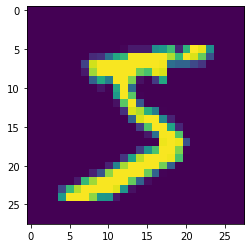

In [8]:
plt.imshow(x_train[0])
print("Label = ",y_train[0])

In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [57]:
model = Sequential() 

In [58]:
model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3), strides = (2,2), padding = 'valid', 
                 activation = 'relu', kernel_initializer = 'he_normal'))

model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(10, kernel_initializer='he_normal' , activation = 'relu' ))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'softmax'))

In [59]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5770      
                                                                 
 batch_normalization_6 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 10)              

In [60]:
adam = optimizers.Adam()
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history  = model.fit(x_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 11s - loss: 0.4760 - accuracy: 0.8664 - val_loss: 0.1636 - val_accuracy: 0.9510 - 11s/epoch - 3ms/step
Epoch 2/10
4200/4200 - 11s - loss: 0.2131 - accuracy: 0.9355 - val_loss: 0.1352 - val_accuracy: 0.9557 - 11s/epoch - 3ms/step
Epoch 3/10
4200/4200 - 11s - loss: 0.1859 - accuracy: 0.9442 - val_loss: 0.1399 - val_accuracy: 0.9574 - 11s/epoch - 3ms/step
Epoch 4/10
4200/4200 - 11s - loss: 0.1692 - accuracy: 0.9483 - val_loss: 0.1160 - val_accuracy: 0.9647 - 11s/epoch - 3ms/step
Epoch 5/10
4200/4200 - 12s - loss: 0.1566 - accuracy: 0.9523 - val_loss: 0.1018 - val_accuracy: 0.9687 - 12s/epoch - 3ms/step
Epoch 6/10
4200/4200 - 11s - loss: 0.1524 - accuracy: 0.9555 - val_loss: 0.1067 - val_accuracy: 0.9663 - 11s/epoch - 3ms/step
Epoch 7/10
4200/4200 - 11s - loss: 0.1472 - accuracy: 0.9540 - val_loss: 0.1017 - val_accuracy: 0.9692 - 11s/epoch - 3ms/step
Epoch 8/10
4200/4200 - 11s - loss: 0.1416 - accuracy: 0.9565 - val_loss: 0.1018 - val_accuracy: 0.9691 - 11s/epoch - 3

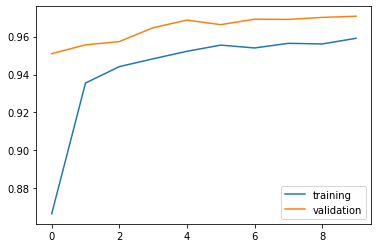

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [62]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9780


[0.07241642475128174, 0.9779999852180481]

In [63]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9723


[0.08658608049154282, 0.9722999930381775]